In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
#reading the dataset
data=pd.read_csv(r'C:\Users\nithin padmanabhan\Downloads\ictak data science\assignment and case study\case study 2\car_age_price.csv')

In [4]:
#checking basic characterestics
data.head()

,Year,Price
0,2018,465000
1,2019,755000
2,2019,700000
3,2018,465000
4,2018,465000


In [5]:
data.shape

(112, 2)

In [6]:
data.nunique()

Year      8
Price    35
dtype: int64

In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 112 entries, 0 to 111
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   Year    112 non-null    int64
 1   Price   112 non-null    int64
dtypes: int64(2)
memory usage: 1.9 KB


In [8]:
data.isna().sum()

Year     0
Price    0
dtype: int64

In [9]:
#ploting correlation matrix
corr_matrix=data.corr()

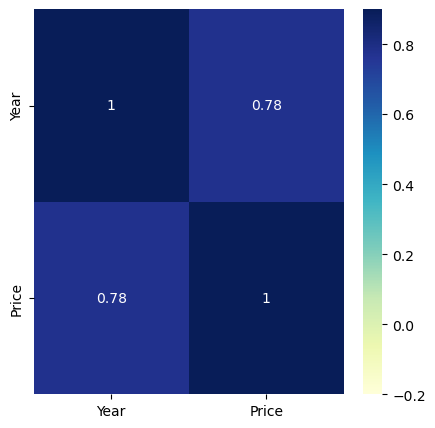

In [10]:
plt.figure(figsize=(5,5))
sns.heatmap(corr_matrix,vmin=-0.2,vmax=0.9,annot=True,cmap="YlGnBu")
plt.show()

### Linear Regression

In [11]:
#seperating dependent and independent variable
x=data.drop(['Price'],axis=1)

In [12]:
y=data['Price']

In [13]:
x

,Year
0,2018
1,2019
2,2019
3,2018
4,2018
...,...
107,2016
108,2014
109,2015
110,2016


In [14]:
y

0      465000
1      755000
2      700000
3      465000
4      465000
        ...  
107    375000
108    300000
109    425000
110    420000
111    425000
Name: Price, Length: 112, dtype: int64

In [15]:
#spliting the dataset as testing and training dataset
from sklearn.model_selection import train_test_split

In [16]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)

In [17]:
#applying linear regression
from sklearn.linear_model import LinearRegression
lin_regressor=LinearRegression()
model=lin_regressor.fit(x_train,y_train) 

In [18]:
predictions=model.predict(x_test)

In [19]:
#finding out MSE and R squared value
from sklearn.metrics import mean_squared_error,r2_score
print('MSE=',mean_squared_error(y_test,predictions))
print('R square value=',r2_score(y_test,predictions))

MSE= 4326906256.829671
R square value= 0.36759313425902185


### Lasso Regression

In [20]:
#spliting the dataset
from sklearn.model_selection import train_test_split

In [21]:
x1_train,x1_test,y1_train,y1_test=train_test_split(x,y,test_size=0.2,random_state=42)

In [26]:
# finding thebest fit value for alpha and applying lasso regression
from sklearn.linear_model import Lasso,LassoCV
lasso=LassoCV(alphas=np.arange(0.000000001,1,0.05),cv=10)
_=lasso.fit(x,y)
print('best alpha:',lasso.alpha_)



best alpha: 1e-09


In [30]:
lasso=Lasso(alpha=int(1e-09))
lasso.fit(x1_train,y1_train)

C:\Users\nithin padmanabhan\AppData\Local\Temp\ipykernel_11584\3239963119.py:2: UserWarning: With alpha=0, this algorithm does not converge well. You are advised to use the LinearRegression estimator
  lasso.fit(x1_train,y1_train)
C:\Users\nithin padmanabhan\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:631: UserWarning: Coordinate descent with no regularization may lead to unexpected results and is discouraged.
  model = cd_fast.enet_coordinate_descent(
C:\Users\nithin padmanabhan\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.383e+11, tolerance: 7.659e+07 Linear regression models with null weight for the l1 regularization term are more efficiently fitted using one of the solvers implemented in sklearn.linear_model.Ridge/RidgeCV instead.
  model 

Lasso(alpha=0)

In [31]:
prdct=lasso.predict(x1_test)

In [32]:
#finding out MSE and R squared value
from sklearn.metrics import mean_squared_error,r2_score
print('MSE=',mean_squared_error(y1_test,prdct))
print('R square value=',r2_score(y1_test,prdct))

MSE= 4326906256.829671
R square value= 0.36759313425902185
